In [1]:
from anthropic import Anthropic
import itertools
import os
%load_ext autoreload

In [2]:
client = Anthropic(
    api_key=os.getenv("ANTHROPIC_API_KEY")
)
model = "claude-3-haiku-20240307"
# model = "claude-3-5-sonnet-20240620"

In [3]:
prompts, responses, fnames = [], [], []

In [4]:
[{"role": "user" if i==0 else "assistant", "content": val if val else ""} for pair in itertools.zip_longest(prompts, responses) for i, val in enumerate(pair)]
def compile_msg_history(prompts: list[str], responses: list[str]):
    """ Transforms lists of messages into a message history usable by the Anthropic API as the `messages` parameter. """
    return [{"role": "user" if i==0 else "assistant", "content": val if val else ""} for pair in itertools.zip_longest(prompts, responses) for i, val in enumerate(pair)]

## Data + Plot: Dummy

In [16]:
fnames.append('data/GDP_growth.csv')
prompts.append("Generate data in CSV format. Output only the data without any other text. The data has 3 columns labeled 'China', 'USA', and 'Russia' tracking GDP in USD from 1980 until 2020. The values in each column are generally increasing in a jagged fashion, but 'China' is increasing most quickly. The values should be of a realistic magnitude for the countries labeled.")
gen_data = client.messages.create(
    model=model,
    max_tokens=1000,
    messages=compile_msg_history(prompts, responses)
)
responses.append(gen_data.content[0].text)
print(responses[-1])

China,USA,Russia
5000000000,10000000000,800000000
5500000000,10200000000,850000000
6000000000,10100000000,900000000
6500000000,11000000000,950000000
7000000000,11500000000,1000000000
7500000000,11200000000,950000000
8000000000,12000000000,1050000000
8500000000,12500000000,1100000000
9000000000,12300000000,1080000000
9500000000,13000000000,1150000000


In [17]:
# Write the content to a .csv file
with open(fnames[-1], "w") as f:
    f.write(responses[-1])

In [18]:
fnames.append('plot.py')
prompts.append(f"Write a python function called `plot_GDP` which creates a line graph of the data you generated. You first need to load the data from the `filename` argument. The graph should appear appropriate for an academic paper. Include a title, legend, axis labels, and tick labels. Use a themed color scheme, not the default color scheme. You may use either the matplotlib or seaborn libraries, but any library you use you must import at the start of the file, including pandas. Output only commented Python code without any ``` backticks surrounding it.")
gen_data = client.messages.create(
    model=model,
    max_tokens=1000,
    messages=compile_msg_history(prompts, responses)
)
if gen_data.content[0].text[:9] == "```python":
    responses.append(gen_data.content[0].text[9:-3])
else:
    responses.append(gen_data.content[0].text)
print(gen_data.content[0].text)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_GDP(filename):
    # Load data from CSV file
    data = pd.read_csv(filename)

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))
    ax = plt.axes()

    # Set the color scheme
    sns.set_palette("Paired")

    # Plot the data
    plt.plot(data['China'], label='China')
    plt.plot(data['USA'], label='USA')
    plt.plot(data['Russia'], label='Russia')

    # Set the title and axis labels
    plt.title('GDP Trends from 1980 to 2020 (in USD)')
    plt.xlabel('Year')
    plt.ylabel('GDP (in USD)')

    # Set the tick labels
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(range(1980, 2021, 5))
    ax.ticklabel_format(style='plain', axis='y')

    # Add a legend
    plt.legend()

    # Set the grid and axis limits
    plt.grid(True)
    plt.xlim(0, len(data) - 1)
    plt.ylim(0, max(data.max()))

    # Save the plot
    plt.savefig('GDP_plot.png', dpi=3

In [19]:
# Write the content to a .py file
with open(fnames[-1], "w") as f:
    f.write(responses[-1])
%autoreload complete

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (9).

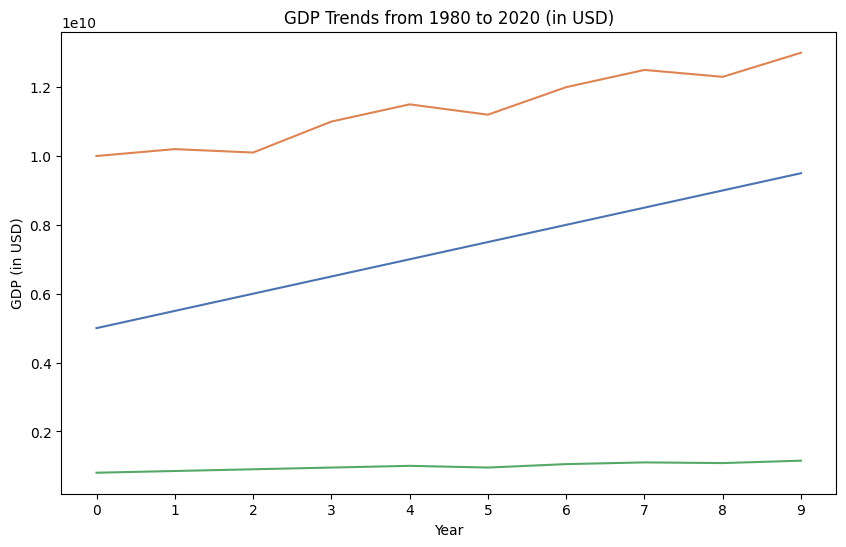

In [20]:
import plot
plot.plot_GDP('data/GDP_growth.csv')
# plot.plot_GDP(fnames[-2])